## outgroup f3-stats including all Eurasians

In [ ]:
%%writefile /home/melinda_yang/projects/neolithic/calcf3_vsMbuti.py

import HOdata
import plotting_funcs as pf
import projmodules as pm
from subprocess import Popen, PIPE
import sys 
#pD = "/home/qiaomei_fu/TY/1240K+YRI/"
pD = "/home/mel_yang/projects/allTYstuff/TY_f3results/" ##ivpp

pD="/home/melinda_yang/projects/neolithic/f3stats/outgroupf3/" ##mpi
outpD="/home/melinda_yang/data/HO_bronzeage/" ##mpi
fh = 'ind_A_v13_TBH5'
#mymain="LiangDao"
mymain=sys.argv[1]
subset = mymain
myinds = HOdata.allHOiwant
print len(myinds)
    
AB = [(mymain,mypop) for mypop in myinds]
Xs = ['Mbuti']

pm.f3popfile(AB, Xs, pD+fh, subset)
pm.f3parfile(pD+fh,subset,)
outfile = open(pD+fh+'.f3.'+subset+".log",'w')
mycommand = 'qp3Pop -p '+pD+fh+'.f3.'+subset+'.par'
print 'Running command', mycommand
        
varfile = Popen(mycommand.split(), stdout = outfile)
varfile.communicate()
outfile.close()
    

### Latitude and Longitude of HO data

In [1]:
import HOdata

ancient=HOdata.anceur2+HOdata.eas+HOdata.eur+HOdata.namer+HOdata.pacific+["Chokhopani"]
ancient=HOdata.anceur2+HOdata.eas+HOdata.namer+["Chokhopani","French","Sardinian"]
ancient.remove("LaRochette")
ancient.remove("Iboussieres39")
#ancient.remove("Jew_Ashkenazi")
#ancient.remove("Jew_Georgian")
#ancient.remove("Jew_Iranian")
#ancient.remove("Jew_Turkish")
#ancient.remove("Urubu_Kaapor")
#ancient.remove("North_Ossetian")
#ancient.remove("Malay")

myeas=ancient #HOdata.allHOiwant

mylat=[0 for i in myeas]
mylong=[0 for i in myeas]
#pd="/mnt/solexa/mel_yang/bronzeage/admixture/" 
#locationfile=open(pd+'pdeas_v12anno.latlong','r')
pd="/mnt/solexa/mel_yang/bronzeage/data/"
locationfile=open(pd+'v13.3_HO.anno','r')
for ind,entry in enumerate(locationfile):
    if entry[0]=="#": continue
    x=entry.split('\t')

    if x[2] in myeas: 
        if x[2] == "Thai": 
            mylat[myeas.index(x[2])]=13.8
            mylong[myeas.index(x[2])]=100.5
            continue
        #if x[2] in HOdata.anceas+HOdata.anceas2: continue
        #print x[2:3]+x[8:11]
        if x[8] in ['-','NA']: mylat[myeas.index(x[2])]=-5
        else: mylat[myeas.index(x[2])]=float(x[8])
        if x[9] in ['-','NA']: mylong[myeas.index(x[2])]=-5
        else: mylong[myeas.index(x[2])]=float(x[9])
        #break
        
latfile = open(pd+"ancientlatlong_rev.txt",'r')
for line in latfile:
    x = line.split()
    if len(x) == 0: continue
    if x[0] == 'Pop': continue
    if x[0] not in ancient: continue
    mylat[myeas.index(x[0])]=float(x[1])
    mylong[myeas.index(x[0])]=float(x[2])
latfile.close() 

for ind,i in enumerate(mylong): print i, mylat[ind], myeas[ind]
#for ind,i in enumerate(sorted(mylat)[::-1]): print mylong[mylat.index(i)] #i, mylat[ind], mylong[ind]
#for i in mylat: print i

71.1 57.43 UstIshim
21.9 45.12 Oase1
39.3 51.23 Kostenki14
4.28 50.26 GoyetQ116-1
23.84 45.35 Cioclovina1
39.3 51.23 Kostenki12
23.46 45.11 Muierii2
16.39 48.53 Vestonice13
16.39 48.53 Vestonice15
16.39 48.53 Vestonice14
16.39 48.53 Vestonice43
16.39 48.53 Pavlov1
16.39 48.53 Vestonice16
15.61 41.65 Paglicci133
15.59 48.41 KremsWA3
17.57 40.73 Ostuni2
17.57 40.73 Ostuni1
15.61 41.65 Paglicci108
4.28 50.26 GoyetQ53-1
4.28 50.26 GoyetQ376-19
4.28 50.26 GoyetQ56-16
103.5 52.9 Malta1
-3.45 43.26 ElMiron
92.87 56.05 AfontovaGora2.SG
92.87 56.05 AfontovaGora3
9.45 48.22 HohleFels79
9.45 48.22 HohleFels49
6.1 47.23 Rigney1
4.28 50.26 GoyetQ-2
9.46 48.24 Brillenhohle
9.35 48.32 Burkhardtshohle
12.21 46.15 Villabruna
6.79 47.01 Bichon
42.92 42.24 Satsurblia
6.45 47.21 Rochedane
13.54 41.96 Continenza
5.43 47.91 Ranchot88
2.11 48.52 LesCloseaux13
43.12 42.13 Kotias
9.04 48.06 Falkenstein
10.09 48.33 Bockstein
10.27 48.49 Ofnet
3.46 49.24 Chaudardes1
6.24 49.7 Loschbour
-5.35 42.93 LaBrana1
21.2 

In [8]:
import HOdata

pD="/mnt/solexa/mel_yang/neolithic/f3stats/outgroupf3/"
fh="ind_A_v13_TBH5"
anceas=["LiangDao","Longlin","Zongri","Bbdong","Boisman_MN","Boshan","HDYM1","Linzi"]

for mainind in anceas:
    logfile=open(pD+fh+".f3."+mainind+".log",'r')
    newfile=open(pD+fh+".f3."+mainind+".map",'w')
    for line in logfile:
        if "result" not in line: continue
        x=line.split()
        if x[2] not in myeas: continue
        if float(x[-1])<25000: continue
        lat,lon=(mylat[myeas.index(x[2])], mylong[myeas.index(x[2])])
        ancpd = 'anc' if x[2] in HOdata.anceur2+["Chokhopani"] else "pd"
        newfile.write("%s\t%.2f\t%.2f\t%s\t%s\n" % (x[2],lat,lon,x[4],ancpd))
        #print x[2],x[4]
    newfile.close()

In [16]:
%%writefile /mnt/solexa/mel_yang/neolithic/f3stats/outgroupf3/heatmap_Pontus_meledit_anc.R
args=commandArgs(TRUE)
PREFIX = as.character(args[1])
LABEL = as.character(args[2])

library(fields)
library(RColorBrewer)

padding = 6

data<-read.table(paste(PREFIX,'.map',sep=''))

NAMES <- as.character(data[,1])
Latitude<-as.numeric(data[,2])
Longitude<-as.numeric(data[,3])

minLong <- min(Longitude)-5*padding
maxLong <- max(Longitude)+padding
minLat <- min(Latitude)-padding
maxLat <- max(Latitude)+padding

#minLong <- 80-5*padding
#maxLong <- 180.5+padding
#minLat <- -75-padding
#maxLat <- 75+padding

print(c(minLat,maxLat))
print(c(minLong,maxLong))
statistic=as.numeric(data[,4])

rgb.palette<-colorRampPalette(c("black","black","midnightblue","blue","lightskyblue","yellow","gold","red")) #
colours<-rgb.palette(30)

x<-as.numeric(data[,4])

png(paste(PREFIX,'.png',sep=''),width=1440*300/72,height=(maxLat-minLat)*1440*300/(maxLong-minLong)/72,res=300)

cols <- as.character(cut(statistic, breaks = length(colours),labels =colours))
plot(Longitude,Latitude,type="n",main=expression(paste(f[3])),xlim=c(minLong,maxLong),ylim=c(minLat,maxLat), cex.lab=2,cex.axis=2)
#,xlim=c(-25,25),ylim=c(40,70)
library(mapdata)
library(maps)
library(maptools)
map(database='worldHires', fill=TRUE,xlim=c(minLong,maxLong),ylim=c(minLat,maxLat),col='lightgray',boundary=FALSE)

CASPIAN <- read.table('/home/mel_yang/rcode/Caspian.txt')
polygon(CASPIAN[,2:1],col='white',border='white')
abline(h = 39.657778, lty = 2)
abline(v = 115.871389, lty = 2)
PCH <- vector(length=length(Longitude))
PCH[1:length(PCH)] <- 21
for (i in 1:nrow(data)) {
    if ( data[i,5] == "anc" ) {
        PCH[i] <- 22 
        }
    }

points(Longitude,Latitude,pch=PCH,bg=cols,col="black",cex=3)
box()

###legend
tempcolours=rev(colours)
#legendposx= 150
legendposx= minLong+padding
legendwidth=2*padding
#legendtop=40
legendtop = maxLat-(maxLat-minLat)/2
legendbottom= minLat+(maxLat-minLat)/10
legendspan=legendtop-legendbottom
legendincrement=legendspan/length(colours)
for(i in 1:length(tempcolours)) {
  rect(legendposx,legendtop-(legendincrement*i),(legendposx+legendwidth),legendtop-(legendincrement*i-legendincrement),col=tempcolours[i],border=NA)
  #text((legendposx+15),(legendtop-(legendincrement*i-legendincrement/2)),"hello")
}
text(legendposx+legendwidth/2,legendtop+(maxLat-minLat)/20,round(max(statistic),3),cex=2)
text(legendposx+legendwidth/2,legendbottom-(maxLat-minLat)/20,round(min(statistic),3),cex=2)
rect(legendposx,legendtop,(legendposx+legendwidth),legendbottom,col=NA)

#text(minLong+(maxLong-minLong)/2.5,minLat+padding,labels=expression(f[3]),cex=2,adj=0)
text(minLong+(maxLong-minLong)/2.5+6,minLat+padding,labels=LABEL,cex=2,adj=0)

dev.off()

Overwriting /mnt/solexa/mel_yang/neolithic/f3stats/outgroupf3/heatmap_Pontus_meledit_anc.R


In [9]:
%%bash
pD="/mnt/solexa/mel_yang/neolithic/f3stats/outgroupf3/"
for mainind in LiangDao Longlin HDYM1 Zongri Bbdong Boisman_MN Boshan Linzi; do
    outname="ind_A_v13_TBH5.f3.${mainind}"
    Rscript ${pD}heatmap_Pontus_meledit_anc.R ${pD}${outname} "f3(${mainind}, X; Mbuti)"
done

[1] -70.25  67.65
[1] -138.00  146.45
null device 
          1 
[1] -70.25  67.65
[1] -138.00  146.45
null device 
          1 
[1] -70.25  67.65
[1] -138.00  146.45
null device 
          1 
[1] -70.25  67.65
[1] -138.00  146.45
null device 
          1 
[1] -70.25  67.65
[1] -138.00  146.45
null device 
          1 
[1] -70.25  67.65
[1] -138.00  146.45
null device 
          1 
[1] -70.25  67.65
[1] -138.00  146.45
null device 
          1 


Loading required package: methods
Loading required package: spam
Loading required package: grid
Spam version 1.3-0 (2015-10-24) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.

Attaching package: ‘spam’

The following objects are masked from ‘package:base’:

    backsolve, forwardsolve

Loading required package: maps
Warning message:
In `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels,  :
  duplicated levels in factors are deprecated
Loading required package: sp
Checking rgeos availability: TRUE
Loading required package: methods
Loading required package: spam
Loading required package: grid
Spam version 1.3-0 (2015-10-24) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding 

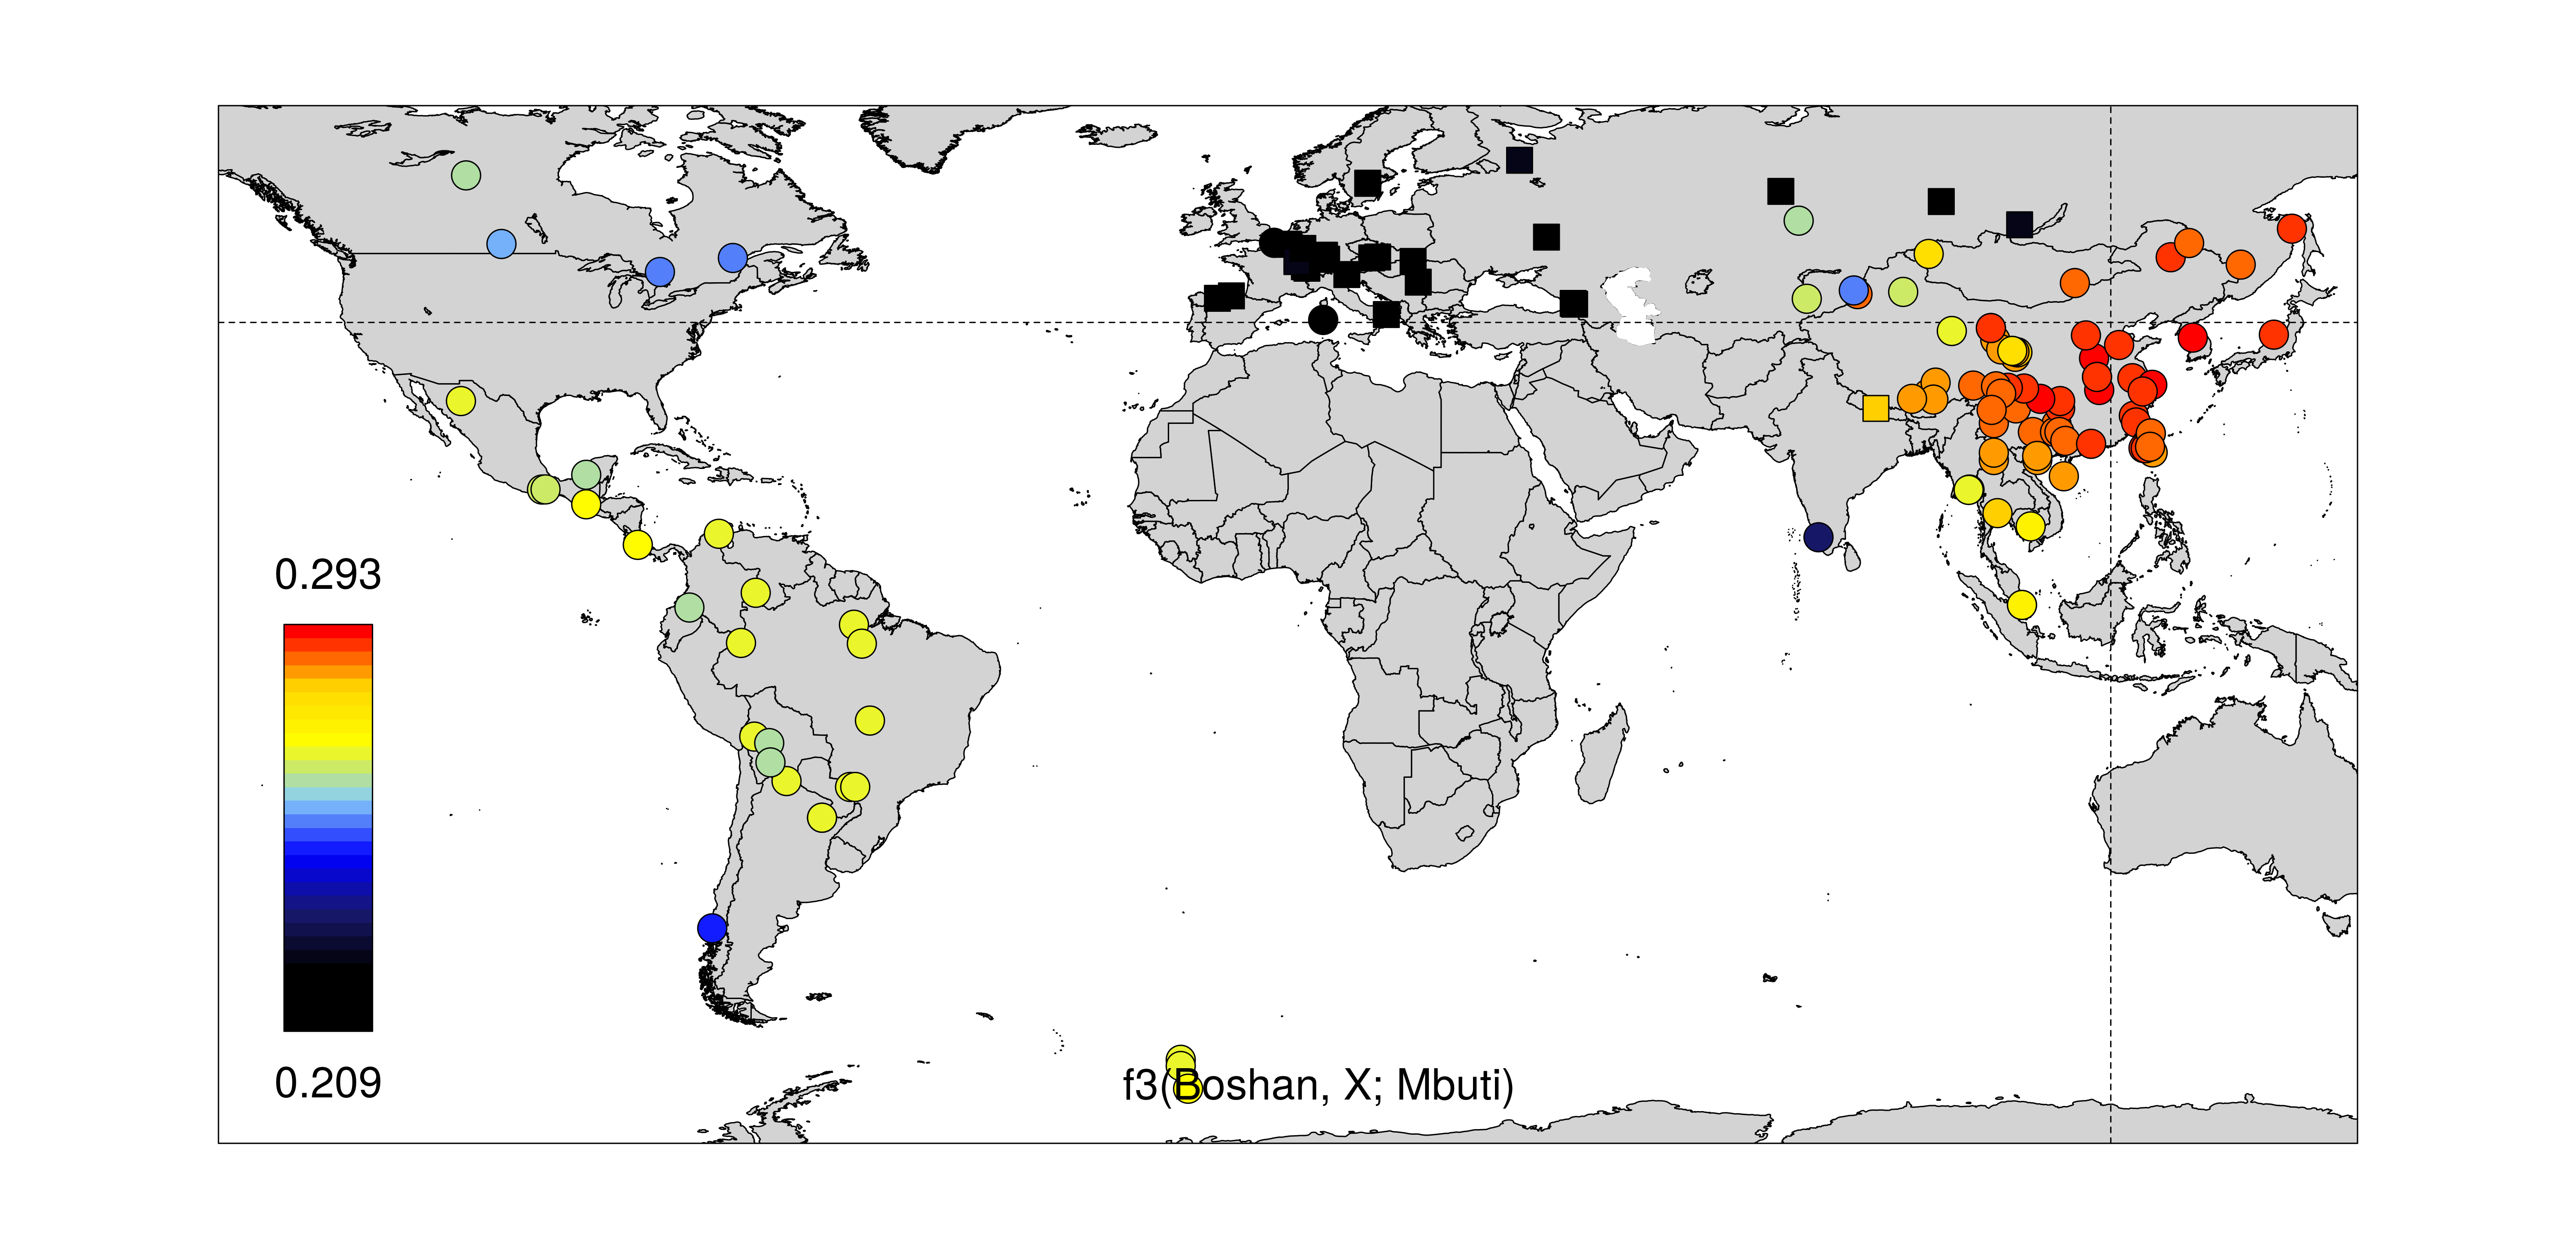

In [4]:
from IPython.display import Image
pD="/mnt/solexa/mel_yang/neolithic/f3stats/outgroupf3/"
outname="ind_A_v13_TBH5.f3.Boshan"
Image(filename=pD+outname+'.png') 


## f3 statistics looking at whether south is admixed
1. f3(Longlin, neas+weas; seas) - nothing
2. f3(LiangDao, neas+weas; seas) - LD+XB/HZ/Tib->Han_HGDP; LD+Tib->Han_NChina
3. f3(neas+weas, seas; LiangDao)
4. f3(namer+Malta1, neas+seas; neas+seas)
5. f3(EUR, neas+weas+seas; LiangDao)

In [ ]:
##%%writefile /home/mel_yang/projects/bronzeage/f3stats/calcf3_SEAS.py
##f3 relationships where check to see if any other popns are mixture of ancient pop and something else
import plotting_funcs as pf
import projmodules as pm
from subprocess import Popen, PIPE
import HOdata
from multiprocessing import Pool

def dof3work(Apop):
    #pD = "/mnt/solexa/mel_yang/bronzeage/data/" ##ivpp
    #outpD = "/home/mel_yang/projects/neolithic/f3stats/" ##ivpp
    pD="/home/melinda_yang/data/HO_bronzeage/" ##mpi
    outpD="/home/melinda_yang/projects/neolithic/f3stats/" ##mpi
    fh = 'ind_A_v13_TBH5'
    fhind= 'ind_A_v13_TBH5'
    #subset = 'X_SEAS_S1_NEAS_S2'+Apop
    #subset = 'X_%s_S1_NEAS_S2_SEAS' % Apop
    #subset = 'X_EAS_S1_NAMER_S2_EAS'
    subset = 'X_%s_S1_EAS_S2_EUR' % Apop
    
    weas=['Tibetan_Shannan','Tibetan_Chamdo','Tibetan_Gangcha','Zongri', 'Chokhopani', 'Mebrak', 'Samdzong']
    neas=['HDYM1','Boisman_MN','Bbdong','Boshan','Linzi','Daur','Hezhen','Mongola','Ulchi','Xibo']
    seas=['Japanese','Korean','Han_NChina','Han_Shandong','Han_HGDP','Dai','Li','Maonan','Miao','She',
           'Zhuang','Ami_Stoneking','Atayal_Stoneking','Kinh_Vietnam_KHV','Longlin','Tianyuan']
    namer=['Mayan.HGDP','Mayan.DG','Piapoco.HGDP','Piapoco.DG','Xavante','Surui',
        'Surui.DG','Surui.HGDP','Mixe','Mixe.DG','Pima.DG','Pima.HGDP', 
        'Karitiana','Karitiana.DG','Karitiana.HGDP','Chane','Chane.DG',
       "Quechua",'Quechua.DG',"Zapotec","Zapotec.DG","Clovis.SG","Aymara",
        "Guarani","Guarani_GN","Guarani_KW","Cabecar","Kaqchikel","Wayuu",
        "Inga","Ticuna","Chilote","Bolivian","Apalai","Arara","UrubuKaapor","Zoro"]
    west=['UstIshim',"Kostenki14","Vestonice16","GoyetQ116-1",'Pavlov1','KremsWA3','Ostuni1','HohleFels49',
      "ElMiron","Malta1","Villabruna",'Bichon','Rochedane','Ranchot88',
      "Loschbour",'LaBrana1','Koros_Hungary_EN_HG.SG','Motala_HG','Karelia_HG','LaRochette',
      "Stuttgart","Satsurblia","Kotias","Sardinian","French"]
    
    #AB = [(i,j) for i in namer+["Malta1"] for j in neas+weas+seas if i != j ]
    #Xs = neas+weas+seas
    
    AB = [(i,j) for i in neas+weas+seas for j in west if i != j ]
    Xs = [Apop]
    
    pm.f3popfile(AB, Xs, outpD+fh, subset)
    pm.f3parfile(pD+fh,subset,popfh=outpD+fh)
    outfile = open(outpD+fh+'.f3.'+subset+".log",'w')
    mycommand1='mv '+pD+fh+'.f3.'+subset+'.par '+outpD+fh+'.f3.'+subset+'.par'
    varfile = Popen(mycommand1.split())
    varfile.communicate()
    mycommand = 'qp3Pop -p '+outpD+fh+'.f3.'+subset+'.par'
    print 'Running command', mycommand

    varfile = Popen(mycommand.split(), stdout = outfile)
    varfile.communicate()
    outfile.close()

ancinds=['Tianyuan',"Longlin","LiangDao","Xinyi"]
ancinds=["LiangDao"]
mypool = Pool(1)
results = mypool.map(dof3work, ancinds)

## Parse through f3 results

In [25]:
pD = "/mnt/solexa/mel_yang/neolithic/f3stats/" ##ivpp
subset = 'X_EAS_S1_NAMER_S2_EAS'
subset="X_SEAS_S1_NEAS_S2Longlin"
fh="ind_A_v13_TBH5"
logfile=open("%s%s.f3.%s.log" % (pD,fh,subset),'r')
for line in logfile:
    if "result" not in line: continue
    x=line.split()
    f3,se,Z,snp=tuple([float(i) for i in x[4:]])
    if x[3]=="Atayal_Stoneking": print line.strip()[15:-6]
    if Z<-2: print '\t'.join(x[1:])
    #print '\t'.join(x[1:])


ibetan_Shannan              Longlin     Atayal_Stoneking      0.055011       0.002258      24.358  
Tibetan_Chamdo              Longlin     Atayal_Stoneking      0.052909       0.002198      24.073  
ibetan_Gangcha              Longlin     Atayal_Stoneking      0.053139       0.002119      25.083  
        Zongri              Longlin     Atayal_Stoneking      0.058088       0.002797      20.769  
    Chokhopani              Longlin     Atayal_Stoneking      0.059884       0.004360      13.736  
        Mebrak              Longlin     Atayal_Stoneking      0.049741       0.004718      10.544  
      Samdzong              Longlin     Atayal_Stoneking      0.053148       0.003116      17.057  
         HDYM1              Longlin     Atayal_Stoneking      0.057237       0.004133      13.850  
    Boisman_MN              Longlin     Atayal_Stoneking      0.056941       0.003065      18.575  
        Bbdong              Longlin     Atayal_Stoneking      0.057209       0.005273      10.850  


## Outgroup f3 -- using non-African as outgroup rather than Mbuti
1. f3(Longlin/Xinyi/LiangDao, SEAS+NEAS+WEAS; O) -- Do O=Mbuti/UstIshim/Onge/Papuan/Loschbour

In [11]:
%%writefile /mnt/solexa/mel_yang/neolithic/f3stats/calcf3_SEAS_out.py
##f3 relationships where check to see if any other popns are mixture of ancient pop and something else
import plotting_funcs as pf
import projmodules as pm
from subprocess import Popen, PIPE
import HOdata
from multiprocessing import Pool

def dof3work(Apop):
    pD = "/mnt/solexa/mel_yang/bronzeage/data/" ##ivpp
    outpD = "/mnt/solexa/mel_yang/neolithic/f3stats/" ##ivpp
    #pD="/home/melinda_yang/data/HO_bronzeage/" ##mpi
    #outpD="/home/melinda_yang/projects/neolithic/f3stats/" ##mpi
    fh = 'ind_A_v13_TBH5'
    fhind= 'ind_A_v13_TBH5'
    subset = 'X_OUT_S1_%s_S2_EAS' % Apop
    
    weas=['Tibetan_Shannan','Tibetan_Chamdo','Tibetan_Gangcha','Zongri', 'Chokhopani', 'Mebrak', 'Samdzong']
    neas=['HDYM1','Boisman_MN','Bbdong','Boshan','Linzi','Daur','Hezhen','Mongola','Ulchi','Xibo']
    seas=['Japanese','Korean','Han_NChina','Han_Shandong','Han_HGDP','Dai','Li','Maonan','Miao','She',
           'Zhuang','Ami_Stoneking','Atayal_Stoneking','Kinh_Vietnam_KHV']
    anc=['Tianyuan',"Longlin","LiangDao","Xinyi"]
    
    AB = [(Apop,j) for j in weas+neas+seas+anc if j != Apop]
    Xs = ["Mbuti","UstIshim","Onge","Papuan","Loschbour"]
    pm.f3popfile(AB, Xs, outpD+fh, subset)
    pm.f3parfile(pD+fh,subset,popfh=outpD+fh)
    outfile = open(outpD+fh+'.f3.'+subset+".log",'w')
    mycommand1='mv '+pD+fh+'.f3.'+subset+'.par '+outpD+fh+'.f3.'+subset+'.par'
    varfile = Popen(mycommand1.split())
    varfile.communicate()
    mycommand = 'qp3Pop -p '+outpD+fh+'.f3.'+subset+'.par'
    print 'Running command', mycommand

    varfile = Popen(mycommand.split(), stdout = outfile)
    varfile.communicate()
    outfile.close()

ancinds=['Tianyuan',"Longlin","LiangDao","Xinyi"]
mypool = Pool(1)
results = mypool.map(dof3work, ancinds)

Writing /mnt/solexa/mel_yang/neolithic/f3stats/calcf3_SEAS_out.py


In [ ]:
%%writefile /mnt/solexa/mel_yang/neolithic/f3stats/calcf3_BBBS_ZR_LD.py
##f3 relationships where check to see if any other popns are mixture of ancient pop and something else
import plotting_funcs as pf
import projmodules as pm
from subprocess import Popen, PIPE
import HOdata
from multiprocessing import Pool

def dof3work(Apop):
    pD = "/mnt/solexa/mel_yang/bronzeage/data/" ##ivpp
    outpD = "/home/mel_yang/projects/neolithic/f3stats/" ##ivpp
    #pD="/home/melinda_yang/data/HO_bronzeage/" ##mpi
    #outpD="/home/melinda_yang/projects/neolithic/f3stats/" ##mpi
    fh = 'ind_A_v13_TBH5'
    fhind= 'ind_A_v13_TBH5.mergeBSBB'
    subset = 'mergeBSBB_X_SEAS_S1_NEAS_S2'+Apop
    subset = 'X_%s_S1_NEAS_S2_SEAS' % Apop
    
    weas=['Tibetan_Shannan','Tibetan_Chamdo','Tibetan_Gangcha','Zongri', 'Chokhopani', 'Mebrak', 'Samdzong']
    neas=['HDYM1','Boisman_MN','Bbdong','Boshan','Linzi','Daur','Hezhen','Mongola','Ulchi','Xibo']
    seas=['Japanese','Korean','Han_NChina','Han_Shandong','Han_HGDP','Dai','Li','Maonan','Miao','She',
           'Zhuang','Ami_Stoneking','Atayal_Stoneking','Kinh_Vietnam_KHV']
    
    AB = [(i,j) for i in weas+neas for j in seas if i != j ]
    Xs = [Apop]
    pm.f3popfile(AB, Xs, outpD+fh, subset)
    pm.f3parfile(pD+fh,subset,indfh=fhind,popfh=outpD+fh)
    outfile = open(outpD+fh+'.f3.'+subset+".log",'w')
    mycommand1='mv '+pD+fh+'.f3.'+subset+'.par '+outpD+fh+'.f3.'+subset+'.par'
    varfile = Popen(mycommand1.split())
    varfile.communicate()
    mycommand = 'qp3Pop -p '+outpD+fh+'.f3.'+subset+'.par'
    print 'Running command', mycommand

    varfile = Popen(mycommand.split(), stdout = outfile)
    varfile.communicate()
    outfile.close()

ancinds=['Tianyuan',"Longlin","LiangDao","Xinyi"]
ancinds=["LiangDao"]
mypool = Pool(1)
results = mypool.map(dof3work, ancinds)